In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import networkx as nx
import pandas as pd
import math
import matplotlib.pyplot as plt
import sys
from random import random
import model

In [2]:
g, w = model.generate_graph()

In [3]:
g

In [4]:
g.nodes(data=True)

NodeDataView({'msg_e': {'attr_dict': {'pos': 'input', 'func': 'input', 'status': {}}}, 'msg_c': {'attr_dict': {'pos': 'input', 'func': 'input', 'status': {}}}, 'msg_p': {'attr_dict': {'pos': 'input', 'func': 'input', 'status': {}}}, 'msg_s': {'attr_dict': {'pos': 'input', 'func': 'input', 'status': {}}}, 'srs_e': {'attr_dict': {'pos': 'inner', 'func': 'id', 'status': {}}}, 'srs_c': {'attr_dict': {'pos': 'inner', 'func': 'id', 'status': {}}}, 'srs_p': {'attr_dict': {'pos': 'inner', 'func': 'id', 'status': {}}}, 'srs_s': {'attr_dict': {'pos': 'inner', 'func': 'id', 'status': {}}}, 'po_msg': {'attr_dict': {'pos': 'inner', 'func': 'special', 'status': {}}}, 'pi_msg': {'attr_dict': {'pos': 'inner', 'func': 'special', 'status': {}}}, 'pe_state': {'attr_dict': {'pos': 'trait', 'func': 'trait', 'status': {}}}, 'po_state': {'attr_dict': {'pos': 'trait', 'func': 'trait', 'status': {}}}, 'is_po': {'attr_dict': {'pos': 'inner', 'func': 'id', 'status': {}}}, 'is_pe': {'attr_dict': {'pos': 'output',

In [5]:
msg_sequence = np.genfromtxt('messages/message3.csv', delimiter=',', skip_header=1)

In [6]:
print(len(msg_sequence))

97


In [7]:
inputsDF, parameters = model.run_message_sequence(message_seq=msg_sequence, traits=np.random.rand(2))

/Users/eric/Documents/Projects/X_Ruben/political_ruben/model.py:266: RuntimeWarning: overflow encountered in power
  values_v.append(np.power(neig_w*neig_s, 2))
/Users/eric/Documents/Projects/X_Ruben/political_ruben/model.py:273: RuntimeWarning: invalid value encountered in double_scalars
  graph.node[node]['status'][t] = previous_state + parameters['po_state_speed'] * (c - previous_state) * delta_t


In [8]:
inputsDF

,is_pe,is_po,msg_c,msg_e,msg_p,msg_s,pe_state,pi_msg,po_msg,po_state,srs_c,srs_e,srs_p,srs_s
0,0.000000,0.000000,0.5,-0.250000,-0.500000,1.0,0.847154,0.000000,0.000000,0.684373,0.000000e+00,0.000000,0.000000,0.000000
1,0.677723,0.547498,0.5,-0.050000,-0.100000,1.0,0.076423,0.000000,0.000000,0.513279,4.000000e-01,-0.200000,-0.400000,0.800000
2,0.196683,0.520123,0.5,0.532179,0.417998,1.0,0.461789,0.240000,-0.128000,0.384960,4.800000e-01,-0.080000,-0.160000,0.960000
3,0.408767,0.411992,0.5,0.263782,0.499698,1.0,0.141106,0.400000,-0.087040,0.322816,4.960000e-01,0.409743,0.302399,0.992000
4,0.194638,0.340651,0.5,0.379770,0.429533,1.0,0.342407,0.640697,0.102584,0.294006,4.992000e-01,0.292974,0.460238,0.998400
5,0.312853,0.303335,0.5,0.231665,0.358427,1.0,0.431380,0.644689,0.204318,0.303222,4.998400e-01,0.362411,0.435674,0.999680
6,0.407675,0.303245,0.5,0.296616,0.314353,1.0,0.488627,0.673774,0.215078,0.318439,4.999680e-01,0.257814,0.373877,0.999936
7,0.472437,0.315400,0.5,0.385463,0.305467,1.0,0.470764,0.637855,0.192557,0.334616,4.999936e-01,0.288855,0.326258,0.999987
8,0.471098,0.330773,0.5,0.455042,0.313414,1.0,0.457175,0.643108,0.169013,0.339963,4.999987e-01,0.366141,0.309625,0.999997
9,0.459960,0.338125,0.5,0.467887,0.327301,1.0,0.440425,0.675077,0.157652,0.342502,4.999997e-01,0.437262,0.312656,0.999999


In [9]:
inputsDF.columns

Index(['is_pe', 'is_po', 'msg_c', 'msg_e', 'msg_p', 'msg_s', 'pe_state',
       'pi_msg', 'po_msg', 'po_state', 'srs_c', 'srs_e', 'srs_p', 'srs_s'],
      dtype='object')

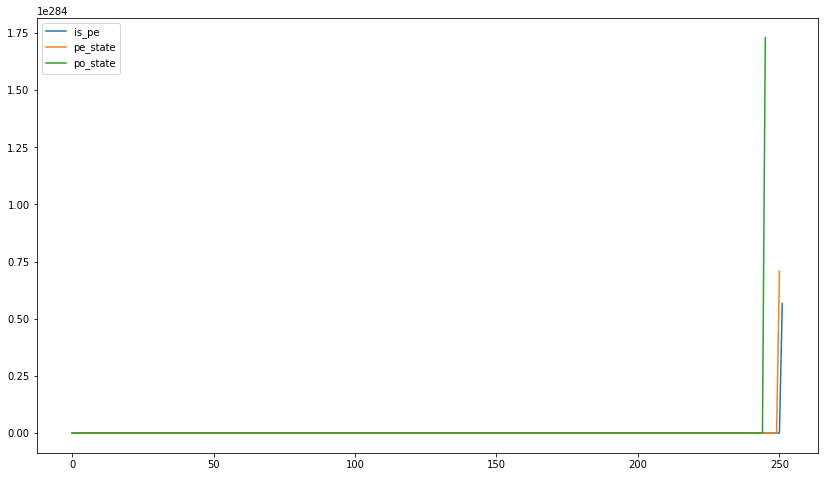

In [10]:
inputsDF[['is_pe', 'pe_state', 'po_state']].plot(figsize=((14,8)))

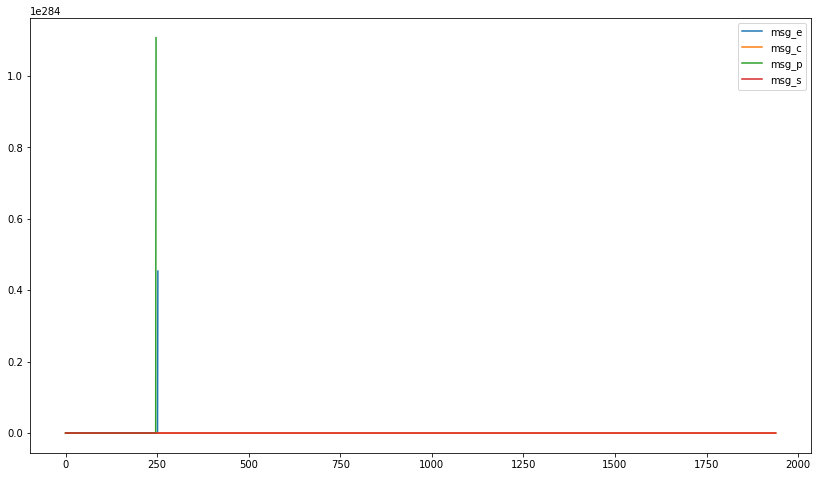

In [11]:
inputsDF[['msg_e', 'msg_c', 'msg_p', 'msg_s']].plot(figsize=((14,8)))

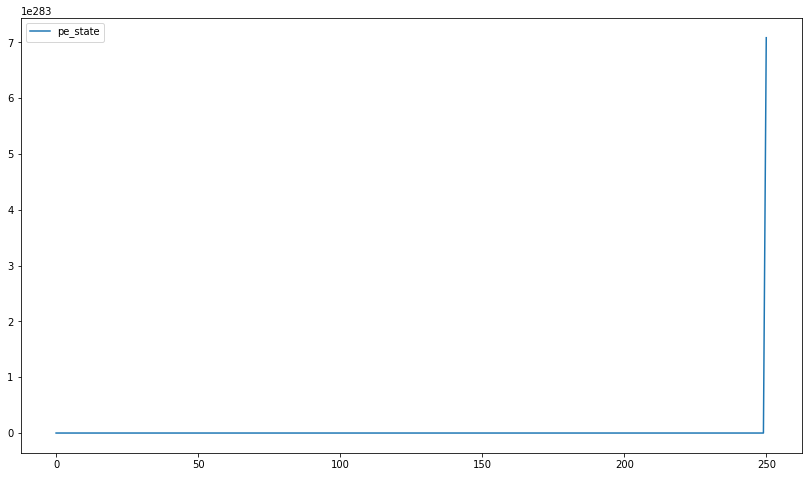

In [12]:
inputsDF[['pe_state']].plot(figsize=((14,8)))